In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download tawfikelmetwally/wine-dataset

Dataset URL: https://www.kaggle.com/datasets/tawfikelmetwally/wine-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/4.45k [00:00<?, ?B/s]
100% 4.45k/4.45k [00:00<00:00, 13.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('wine-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

WCSS: 3179.7848649884327
Cluster counts: [105  30  43]


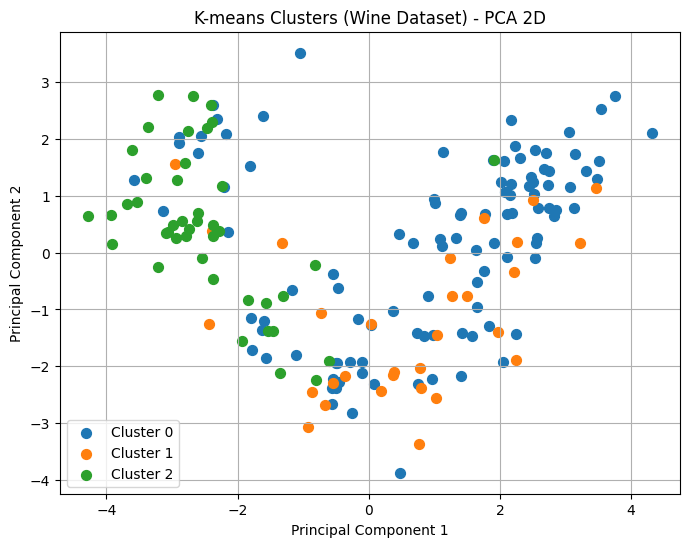

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv('Wine dataset.csv')
x = data.drop('class',axis=1).values
y = data['class'].values
#print(x.head())
#data.info()

scaler = StandardScaler()
scaled = scaler.fit_transform(x)

def centroids(x,k):
  centroid = np.random.choice(len(x),k,replace=False)
  return x[centroid]

def distances(x,centroid):
  return np.linalg.norm(x[:,np.newaxis]-centroid,axis=2)

def clusters(distance):
  return np.argmin(distance,axis=1)

def update_centroid(x,labels,k):
  new_centroid = []
  for i in range(k):
    points = x[labels==i]
    if(len(points)>0):
      new_centroid.append(points.mean(axis=0))
    else:
      new_centroid.append(x[np.random.choice(len(x))])
  return np.array(new_centroid)

def compute_wcss(x,labels,centroid):
  wcss = 0
  for i in range(len(centroid)):
    cluster_point = x[labels==i]
    wcss += np.sum((cluster_point-centroid[i])**2)
  return wcss

def Kmeans(x,k,max_iter=100,tol=0.0001):
  centroid = centroids(x,k)
  for _ in range(max_iter):
    old_centroid = centroid.copy()
    distance = distances(x,centroid)
    labels = clusters(distance)
    new_centroid = update_centroid(x,labels,k)
    if np.linalg.norm(new_centroid-old_centroid)<tol:
      break
  wcss = compute_wcss(x,labels,centroid)
  return labels,centroid,wcss

k = 3
labels, centroids, wcss = Kmeans(scaled, k)

print(f"WCSS: {wcss}")
print(f"Cluster counts: {np.bincount(labels)}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)


plt.figure(figsize=(8,6))
for cluster_id in range(k):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        s=50
    )

plt.title("K-means Clusters (Wine Dataset) - PCA 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# plt.scatter(x[:,0],x[:,1])
# plt.show()

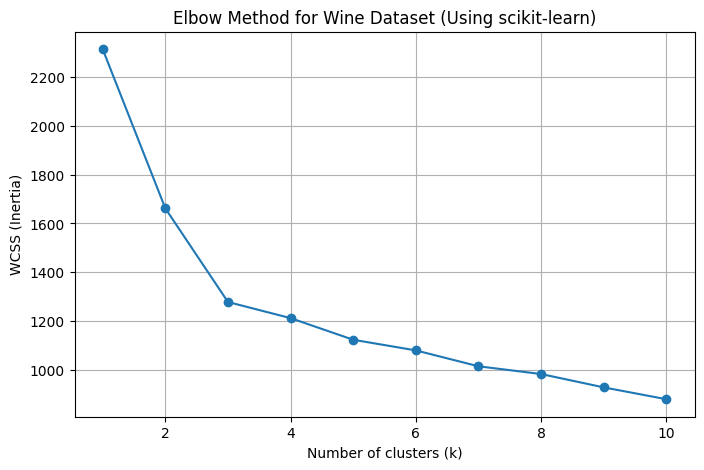

ARI: 0.8974949815093207
Accuracy : 0.016853932584269662


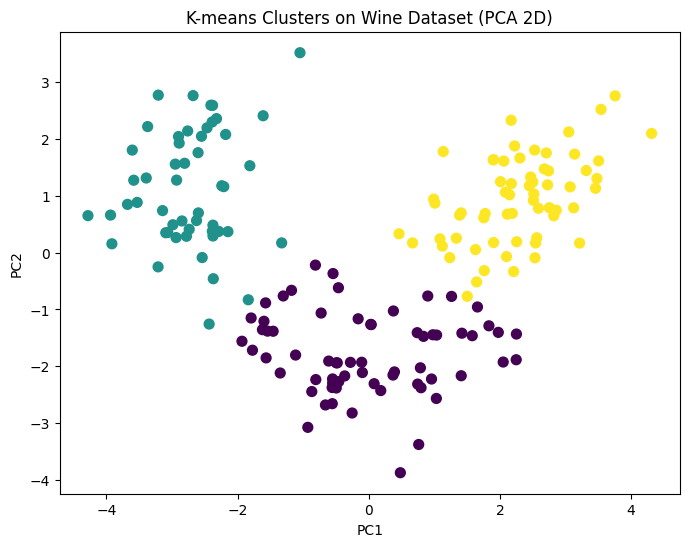

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,adjusted_rand_score
from sklearn.decomposition import PCA

wine = load_wine()
x = wine.data
y = wine.target
#sns.boxplot(x)
df = pd.DataFrame(x,columns=wine.feature_names)
#df.info()
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

#finding the number of clusters using elbow method.
wcss = []
k = range(1,11)

for i in k:
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k, wcss, marker='o')
plt.title("Elbow Method for Wine Dataset (Using scikit-learn)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

#implementing kmeans clustering.
kmeans = KMeans(n_clusters = 3 ,random_state=42)
clusters = kmeans.fit_predict(scaled)

accuracy = accuracy_score(y,clusters)
ari = adjusted_rand_score(y,clusters)
print("ARI:",ari)
print("Accuracy :",accuracy)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled)
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1], c=clusters, cmap='viridis', s=50)
plt.title("K-means Clusters on Wine Dataset (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



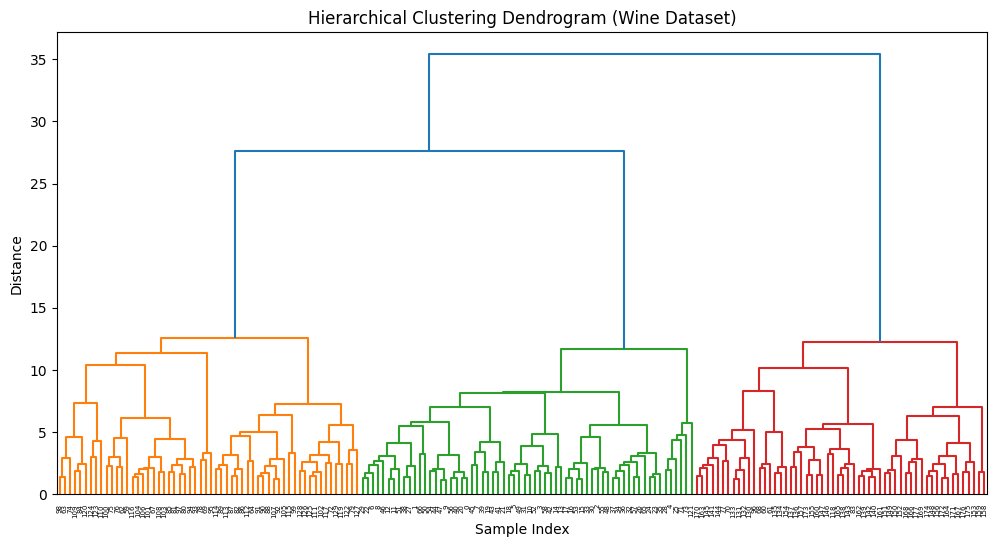

ARI: 0.7899332213582837
Cluster counts: [ 0 56 64 58]


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.metrics import adjusted_rand_score

wine = load_wine()
x = wine.data
y = wine.target

scaler = StandardScaler()
scaled = scaler.fit_transform(x)

linked = linkage(scaled,method = 'ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Wine Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

k = 3
clusters = fcluster(linked, k, criterion='maxclust')
ari = adjusted_rand_score(y,clusters)
print("ARI:",ari)
print("Cluster counts:", np.bincount(clusters))